# This notebook is for gathering images for Ming's report to Nancy
### I need to gather several images with this notebook:
- a 3 x 3 imaging session (all images separate)
- the result of stitching that 3 x 3
-- the 3x 3 should show some of the messy region of the chip + some good region
- a stitch of a large region of the chip, showing all 40 channels and about 1cm of width

### I also need an image of the live camera feed + an image of configuration menu

In [1]:
from imager.chip_imager import ChipImager
from camera.concurrent_pmm_camera import CPMMCamera
from stage.pmm_stage import PMMStage
from stitcher.linear_stitcher import LinearStitcher
from imager.imaging_grid import ImagingGrid

In [2]:
cam = CPMMCamera()
cam.connect()

In [3]:
stage = PMMStage()

In [4]:
imager = ChipImager(stage, cam)

In [5]:
import matplotlib.pyplot as plt
from PIL import Image

In [6]:
cam.set_exposure(100)
cam.set_gain(50)

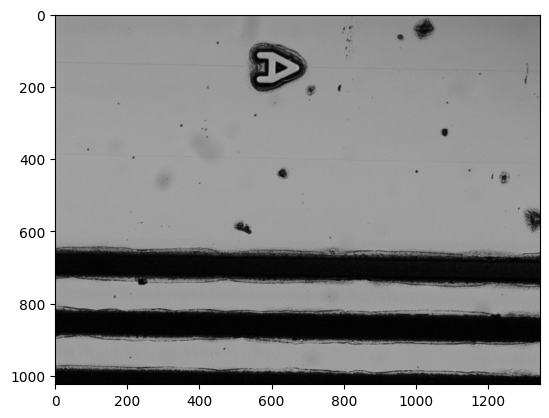

In [14]:
im = cam.take_image()
im[0][0] = 65535
plt.imshow(im, cmap='gray')

In [15]:
imager.save_top_left_pos()

In [21]:
grid = imager.get_imaging_grid()
grid.get_num_cells()

56

In [22]:
grid = ImagingGrid()

In [20]:
grid.set_imaging_width(8000)
grid.set_imaging_height(10000)
grid.set_distance_between_images(1500)

In [92]:

grid.set_imaging_width(1)
grid.set_imaging_height(1)
grid.set_distance_between_images(1500)

In [22]:
grid.set_pixels_per_um(0.6278)

In [23]:
imager.run_image_acquisition(r"C:\Users\Luke\Desktop\chip-imager\chip-imaging\backend\src\demo_images\data")

In [24]:
stitcher = LinearStitcher(r"C:\Users\Luke\Desktop\chip-imager\chip-imaging\backend\src\demo_images\data", grid)

In [25]:
grid.set_top_left((0,0))

In [26]:
grid.get_num_cells()

56

In [27]:
stitcher.set_xy_shift(0, 50)

In [28]:
res = stitcher.run()

[0, 0]
[941, 50]
[1883, 100]
[2825, 150]
[3766, 200]
[4708, 250]
[5650, 300]
[0, 941]
[941, 991]
[1883, 1041]
[2825, 1091]
[3766, 1141]
[4708, 1191]
[5650, 1241]
[0, 1883]
[941, 1933]
[1883, 1983]
[2825, 2033]
[3766, 2083]
[4708, 2133]
[5650, 2183]
[0, 2825]
[941, 2875]
[1883, 2925]
[2825, 2975]
[3766, 3025]
[4708, 3075]
[5650, 3125]
[0, 3766]
[941, 3816]
[1883, 3866]
[2825, 3916]
[3766, 3966]
[4708, 4016]
[5650, 4066]
[0, 4708]
[941, 4758]
[1883, 4808]
[2825, 4858]
[3766, 4908]
[4708, 4958]
[5650, 5008]
[0, 5650]
[941, 5700]
[1883, 5750]
[2825, 5800]
[3766, 5850]
[4708, 5900]
[5650, 5950]
[0, 6591]
[941, 6641]
[1883, 6691]
[2825, 6741]
[3766, 6791]
[4708, 6841]
[5650, 6891]


In [208]:
cam._cam._core.reset()

In [29]:
im = Image.open(r"C:\Users\Luke\Desktop\chip-imager\chip-imaging\backend\src\demo_images\data\stitched.TIFF")

In [30]:
im.save(r"C:\Users\Luke\Desktop\chip-imager\chip-imaging\backend\src\demo_images\middle_big.png")

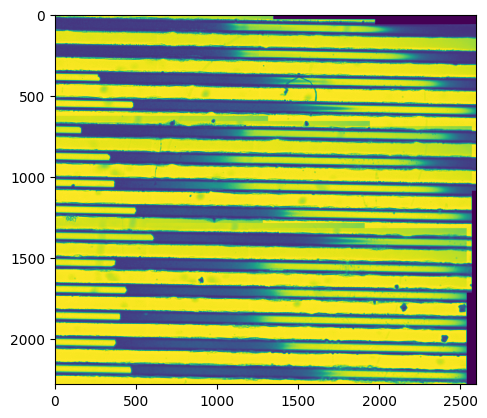

In [136]:
plt.imshow(im)

In [138]:
del im

In [143]:
images = stitcher._load_tiff_images()

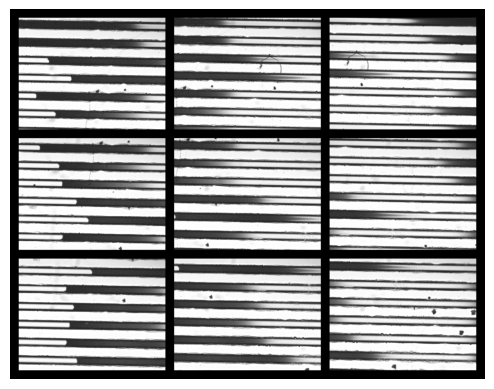

In [206]:
canvas = Image.new(mode="I;16", size=(1344 * 3 + 320, 1024 * 3 + 320))
for i, image in enumerate(images):
    x = i % 3
    y = i // 3
    canvas.paste(image, (x * 1344 + 80 * (x + 1),  y * 1024 + 80 * (y + 1)))
plt.axis('off')
plt.imshow(canvas, cmap='gray')
canvas.save(r"C:\Users\Luke\Desktop\chip-imager\chip-imaging\backend\src\demo_images\side_by_side.png")

In [207]:
del images